In [31]:
# collecting data
import pandas as pd

import pandas_datareader.data as web 
#for timeline specification
import datetime as dt
import matplotlib.pyplot as plt
# to format dates
import matplotlib.dates as mdates
from matplotlib import style

# showing all columns 
pd.set_option('display.max_columns', None)



### collecting stock data on GOOG / BTC

In [19]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2022, 8, 31)
# top 10 tickers in S&P
tickers = ['AAPL','MSFT','UNH']
cc = "BTC-USD"

### collecting data from yahoo using a web reader 

In [20]:
for ticker in tickers:   
    data = web.DataReader(ticker, "yahoo", start, end)
    # saving differnt csv for diferent tickers
    data.to_csv("{}.csv".format(ticker))

In [6]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-25,117.779999,115.050003,115.150002,117.699997,14874700.0,117.699997
2022-08-26,116.599998,111.220001,115.809998,111.300003,31698700.0,111.300003
2022-08-29,111.959999,109.809998,110.779999,110.339996,20386100.0,110.339996
2022-08-30,111.370003,108.800003,111.029999,109.910004,20548200.0,109.910004
2022-08-31,111.769997,109.050003,111.629997,109.150002,25898000.0,109.150002


### btc prices

In [9]:
btc_data = web.DataReader(cc, "yahoo", start, end)

In [11]:
btc_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-28,20139.054688,19616.814453,20041.035156,19616.814453,24366810591,19616.814453
2022-08-29,20357.462891,19600.785156,19615.154297,20297.994141,32637854078,20297.994141
2022-08-30,20542.644531,19617.640625,20298.611328,19796.808594,34483360283,19796.808594
2022-08-31,20420.990234,19799.582031,19799.582031,20049.763672,33225232872,20049.763672
2022-09-01,20198.390625,19653.968750,20050.498047,20127.140625,30182031010,20127.140625


In [23]:
df = pd.read_csv("AAPL.csv", parse_dates = True,
                index_col = "Date")

In [25]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.853355
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.781409
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.792844
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.724232
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.758538


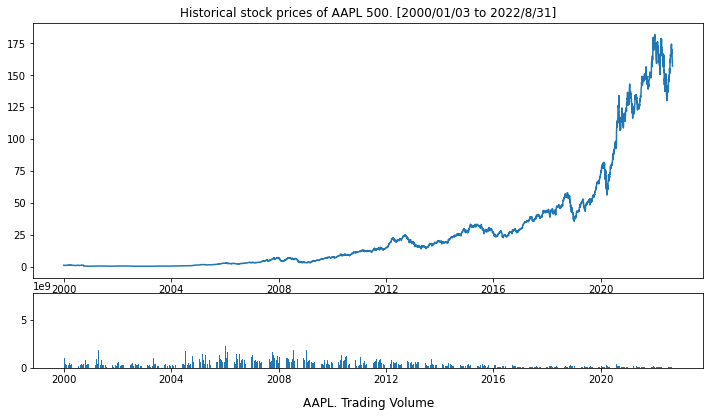

In [34]:
#visualizing volume and price
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(df.index, df["Close"])
plt.title('Historical stock prices of AAPL 500. [2000/01/03 to 2022/8/31]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(df.index, df['Volume'])
plt.title('\nAAPL. Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)
# plt.savefig("AAPL.png")